# GE Aviation 

GE Aviation is the world leader in providing aircraft engines, systems and avionics.

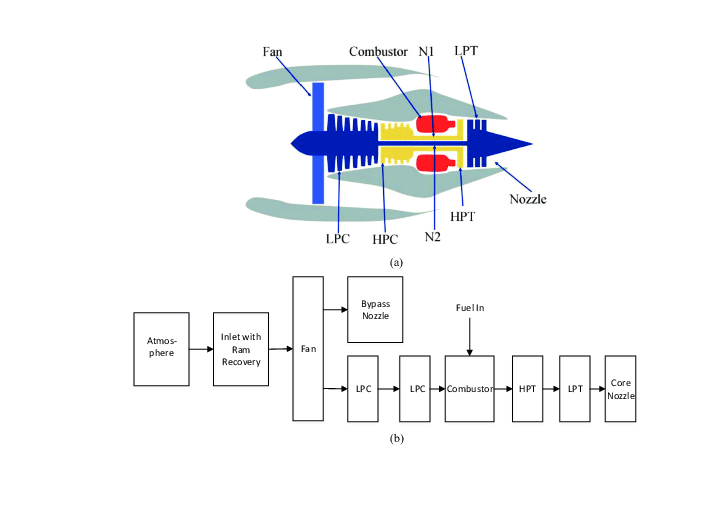

## Business Understanding

Maintenance of aircraft engines is expensive and time consuming; maintenance costs typically account for between ten and twenty per cent of aircraft-related operating costs. Hence,it is necessary to optimize maintenance,improving the competitive position.Thus, the business areas include maintenance of aircraft engines, both commercial and military.

When an engine is removed for maintenance, it needs to be replaced by a spare as the operator normally requires access to an operational aircraft during the maintenance period.The spare engine may be owned by the operator or the maintenance supplier, or it may be leased from a third party. The cost of the spare engine is always significant, regardless of how it is obtained. Every maintenance event is therefore associated with a more or less fixed cost in addition to variable costs such as material costs.

Efficient maintenance of an aircraft focuses on ensuring the realization of the inherent safety and reliability levels of the aircraft and restoring safety and reliability to their inherent levels when deterioration has occurred. Such maintenance plays a key role in airline operation because it is essential to the safety of passengers and the reliability of airline schedules. An unexpected failure that may lead to an aircraft crash must be avoided at all costs.

Aircraft maintenance involves actions intended to restore an item to an operational condition. These actions can be subdivided into inspection and determination of condition, overhaul, servicing, modification, and repair. The common goal of maintenance is to provide a fully serviceable aircraft when it is required by an airline at minimum cost. Effective and efficient maintenance is therefore a prerequisite for a successful aviation industry.

An aircraft engine is a complex and advanced system that has to meet high standards of safety and reliability. Regular maintenance with disassembling and replacement of parts is therefore required. Maintaining a fleet of aircraft also presents challenges from a business perspective since the goals of decreasing maintenance and operations costs may conflict with desired service levels and safety levels. Maintenance and how it is performed is therefore of the utmost importance. While an engine is being maintained, it is not available for operation. This can have serious consequences if the engine in question is needed for operation in, say, a combat situation.
It is therefore very important to determine exactly what maintenance is needed and to avoid excessive maintenance.

Maintaining an aircraft engine is not only complex and time consuming but also very expensive. It may account for approximately 30% of the total maintenance cost for an aircraft. It is therefore of great importance to be time efficient and to decrease costs without jeopardizing safety. It is also very important to avoid performing excessive work and/or component replacement, which would both reduce engine availability and lead to the discarding of components with life remaining.


###  Flight Data

Columns 

dataset : Master data set for the case study 

esn: Engine serial unique number given for a specific engine  

unit: Engine unit number assigned to a given ESN

flight cycle : Several flight cycles are recorded for given ESN

datetime : Date and time when the engine measurements were taken

operator: unique code for a specific airline

depart_icao: code for the departure airport

destination_icao: code for the destination airport

hpc_eff_mod:High Pressure Compressor (HPC) efficiency modifier

hpc_flow_mod: High Pressure Compressor (HPC) flow modifier

tra: Throttle Resolver Angle 

t2: Total temperatura at fan inlet

t24: Total temperature at Low Presssure Compressor (LPC) outlet

t30: Total temperature at High Pressure Compressor (HPC) outlet

t50:Total temperature at Low Pressure Turbine (LPT) outlet

p2: Pressure at fan inlet

p15: Total pressure at High Pressure Compressor (HPC) outlet

p30: Total pressure at High Pressure Compressor (HPC) outlet

nf: Physical fan speed

nc: Physical core speed

epr: Engine pressure ratio(p30/p2)

ps30: Static pressure at HPC outlet

phi: Ratio of fuel flow to ps30

nrf:Corrected fan speed 

nrc: Corrected core speed

bpr: Bypass Ratio

farb:Burner fuel-air ratio

htbleed: Bleed Enthalpy

nf_dmd: Demand fan speed 

pcnfr_dmd: Demand corrected fan speed

w31: HPT coolant bleed

w32: LPT coolant bleed

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import plotly.io as pio
from plotly.offline import iplot
from __future__ import print_function
from ipywidgets import interact, interactive
import ipywidgets as widgets
import plotly.graph_objects as go
from openpyxl import load_workbook
from numpy.core.fromnumeric import repeat, shape
from datetime import datetime, date, time
from mpl_toolkits.basemap import Basemap

In [6]:
# Load in the workbook
wb = load_workbook('../data/GE_Dataset_ Task1.xlsx')
print(wb.sheetnames)

['Title Sheet', 'Sheet1', 'av_engine_data_axm_psql', 'av_engine_data_fron_psql', 'av_engine_data_aic_psql', 'av_engine_data_pgt_psql', 'av_lkp_airport_codes_t_psql', 'av_bom_manufacturing_psql', 'av_manufacturing_supply_chain', 'av_esn_rul_psql']


In [7]:
# Get currently active sheet
ws = wb.active
print(ws)

<Worksheet "Title Sheet">


In [8]:
df01_flight_data = pd.read_excel("../data/GE_Dataset_ Task1.xlsx",sheet_name="av_engine_data_axm_psql",engine="openpyxl",parse_dates=True)
df01_flight_data.head()

,dataset,esn,unit,flight_cycle,...,nf_dmd,pcnfr_dmd,w31,w32
0,test_FD001,999126,26,1,...,2388,100,38.82,23.3876
1,test_FD001,999126,26,2,...,2388,100,39,23.3793
2,test_FD001,999126,26,3,...,2388,100,39.2,23.339
3,test_FD001,999126,26,4,...,2388,100,38.97,23.3931
4,test_FD001,999126,26,5,...,2388,100,39.11,23.3904


In [9]:
df01_flight_data.shape

(21188, 32)

In [10]:
df01_flight_data.isna().sum()

dataset               0
esn                   0
unit                  0
flight_cycle          0
datetime              0
operator              0
depart_icao         780
destination_icao    990
hpc_eff_mod           0
hpc_flow_mod          0
tra                   0
t2                    0
t24                   0
t30                   0
t50                   0
p2                    0
p15                   0
p30                   0
nf                    0
nc                    0
epr                   0
ps30                  0
phi                   0
nrf                   0
nrc                   0
bpr                   0
farb                  0
htbleed               0
nf_dmd                0
pcnfr_dmd             0
w31                   0
w32                   0
dtype: int64

In [11]:
df01_flight_data.duplicated().any()

True

In [12]:
df01_flight_data_drop_duplicated = df01_flight_data.drop_duplicates()

In [13]:
df01_flight_data_drop_duplicated.shape

(10594, 32)

In [14]:
df01_flight_data_clean = df01_flight_data_drop_duplicated.dropna(how='any')

In [15]:
df01_flight_data_clean['dataset'].unique()

array(['test_FD001', 'train_FD001'], dtype=object)

In [16]:
df01_flight_data_clean['esn'].unique()

array([999126, 999114, 999149, 999062, 999026, 999140, 999029, 999110,
       999055, 999127, 999049, 999118, 999011, 999147, 999034, 999132,
       999060, 999152, 999054, 999123, 999146, 999019, 999108, 999010,
       999033, 999111, 999044, 999160, 999009, 999131, 999008, 999145,
       999002, 999136, 999037, 999107, 999057, 999106, 999045, 999164,
       999064, 999176, 999170, 999165, 999091, 999083, 999100, 999090,
       999196, 999181, 999072, 999174, 999076, 999099, 999093, 999098,
       999094, 999173, 999097, 999187, 999188, 999085, 999180, 999190,
       999096, 999191, 999179, 999193, 999074, 999172])

In [17]:
df01_flight_data_clean['dataset'].value_counts()

train_FD001    5215
test_FD001     4848
Name: dataset, dtype: int64

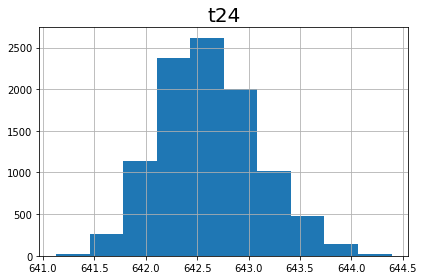

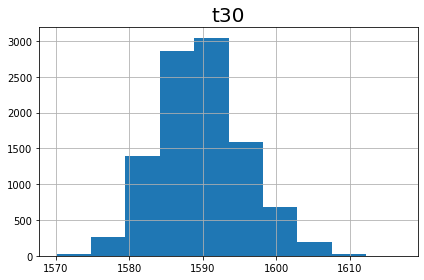

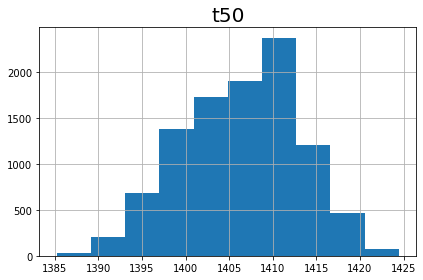

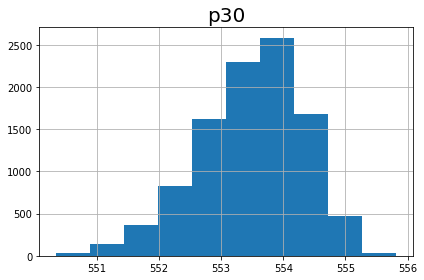

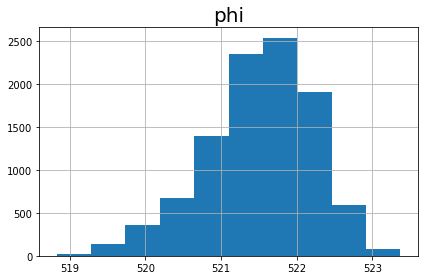

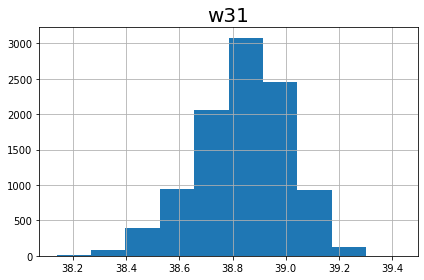

In [18]:
df01_flight_data_continuos_variables = df01_flight_data_clean[['t24','t30','t50','p30','phi','w31']]
for col in df01_flight_data_continuos_variables.columns:
    plt.hist(df01_flight_data_continuos_variables[col])
    plt.grid(True, axis="both")
    plt.title(col, size=20)
    plt.tight_layout()
    plt.show()

In [19]:
df01_flight_data_clean.loc[:,['hpc_eff_mod','hpc_flow_mod','t24','t30','p2','p15','p30','nf','nc','t50','nrf','nrc','w31']].describe().T

,count,mean,std,min,25%,50%,75%,max
hpc_eff_mod,10063,-3.12134e-05,0.00219105,-0.0087,-0.0015,0,0.0014,0.0087
hpc_flow_mod,10063,6.35993e-06,0.00029282,-0.0006,-0.0002,0,0.0003,0.0007
t24,10063,642.617,0.480838,641.13,642.27,642.58,642.92,644.39
t30,10063,1589.83,5.89813,1570.12,1585.69,1589.57,1593.46,1616.91
p2,10063,14.62,3.55289e-15,14.62,14.62,14.62,14.62,14.62
p15,10063,21.6098,0.00149769,21.6,21.61,21.61,21.61,21.61
p30,10063,553.482,0.84719,550.35,552.95,553.57,554.1,555.81
nf,10063,2388.09,0.0697635,2387.89,2388.04,2388.09,2388.13,2388.5
nc,10063,9062.09,18.0524,9024.27,9052.1,9059.4,9066.9,9239.76
t50,10063,1406.43,6.69639,1385.21,1401.46,1406.88,1411.37,1424.48


In [20]:
df01_flight_data_clean.loc[50:55,['esn','flight_cycle','datetime','w31','t50']].sort_values(by=['flight_cycle','datetime'])

,esn,flight_cycle,datetime,w31,t50
54,999149,1,2018-01-01 17:24:16,38.95,1405.05
55,999149,2,2018-01-01 20:42:20,39.08,1391.77
50,999114,24,2018-01-07 02:22:01,38.71,1404.42
51,999114,25,2018-01-07 19:17:00,38.85,1403.99
53,999114,27,2018-01-07 22:37:00,38.65,1410.3


In [21]:
df01_flight_data_clean.groupby(["dataset","esn"])["flight_cycle"].max().reset_index()   

,dataset,esn,flight_cycle
0,test_FD001,999106,105
1,test_FD001,999107,160
2,test_FD001,999108,166
3,test_FD001,999110,192
4,test_FD001,999111,83
5,test_FD001,999114,46
6,test_FD001,999118,133
7,test_FD001,999123,130
8,test_FD001,999126,76
9,test_FD001,999127,140


In [22]:
df_aircraft_engine01 = df01_flight_data_clean[df01_flight_data_clean["esn"]==999149]

In [23]:
df_aircraft_engine01.tail()

,dataset,esn,unit,flight_cycle,...,nf_dmd,pcnfr_dmd,w31,w32
9476,test_FD001,999149,49,299,...,2388,100,38.8,23.2172
9477,test_FD001,999149,49,300,...,2388,100,38.58,23.1759
9478,test_FD001,999149,49,301,...,2388,100,38.59,23.0071
9479,test_FD001,999149,49,302,...,2388,100,38.68,23.0789
9510,test_FD001,999149,49,303,...,2388,100,38.56,23.1167


In [24]:
df_aircraft_engine01["flight_cycle"].min()

1

In [25]:
df_aircraft_engine01["flight_cycle"].max()

303

In [26]:
df_aircraft_engine01["depart_icao"].unique()

array(['WMKK', 'WBKW', 'WIII', 'WBKL', 'WBGS', 'WBKK', 'WMKP', 'WMKC',
       'WBGB', 'VHHH', 'VTSG', 'VTBD', 'VVTS', 'VLLB', 'WBGR', 'WBGG',
       'VVNB', 'VTSP', 'VTCC', 'VDPP', 'WBKS', 'WMKJ', 'WIMM', 'WADL',
       'WIEE'], dtype=object)

In [27]:
df_aircraft_engine01.groupby('depart_icao')['t30'].describe()

,count,mean,std,min,25%,50%,75%,max
depart_icao,,,,,,,,
VDPP,2,1587.51,2.26274,1585.91,1586.71,1587.51,1588.31,1589.11
VHHH,2,1585.38,1.19501,1584.53,1584.95,1585.38,1585.8,1586.22
VLLB,16,1587.61,5.47404,1577.73,1584.55,1587.7,1591.78,1596.53
VTBD,11,1587.27,4.85442,1579.31,1583.89,1588.38,1589.32,1597.93
VTCC,6,1587.66,5.63647,1578.82,1584.29,1589.86,1591.39,1593.1
VTSG,2,1587.12,4.90025,1583.65,1585.38,1587.12,1588.85,1590.58
VTSP,2,1591.74,3.06177,1589.57,1590.65,1591.74,1592.82,1593.9
VVNB,3,1587.9,6.66996,1580.36,1585.34,1590.31,1591.67,1593.03
VVTS,7,1585.56,2.90045,1580.73,1584.01,1586.62,1587.28,1589.01


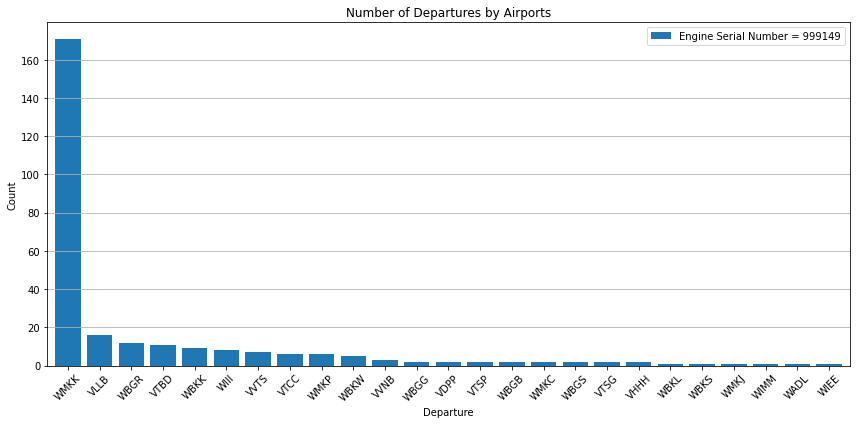

In [28]:
departure_airport_counts = df_aircraft_engine01["depart_icao"].value_counts()
plt.rcParams["figure.figsize"]=(12,6)
departure_airport_counts.plot(kind="bar", width=0.8)
plt.grid(True, axis="y")
plt.xticks(rotation=45)
plt.title("Number of Departures by Airports")
plt.xlabel("Departure")
plt.ylabel("Count")
plt.legend(['Engine Serial Number = 999149'])
plt.tight_layout()
plt.show()

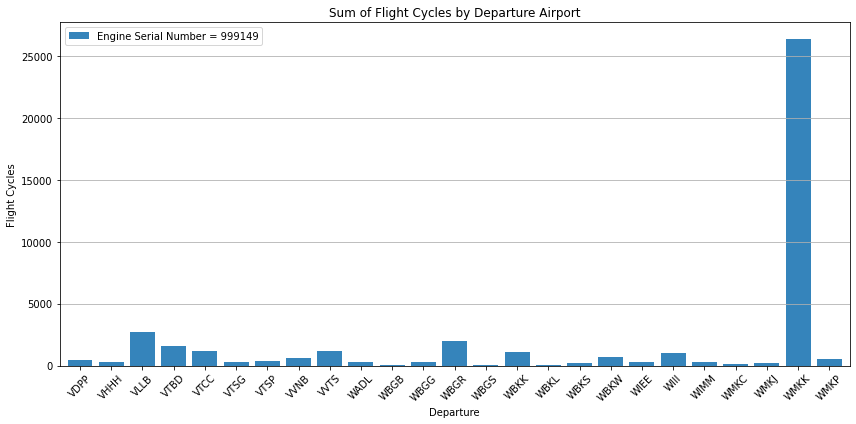

In [29]:
flight_cycle_sum = df_aircraft_engine01.groupby("depart_icao")['flight_cycle'].sum()
flight_cycle_sum.plot(kind="bar", width=0.8, alpha=0.9)
plt.grid(True, axis="y")
plt.xticks(rotation=45)
plt.title("Sum of Flight Cycles by Departure Airport")
plt.xlabel("Departure")
plt.ylabel("Flight Cycles")
plt.legend(['Engine Serial Number = 999149'])
plt.tight_layout()
plt.show()

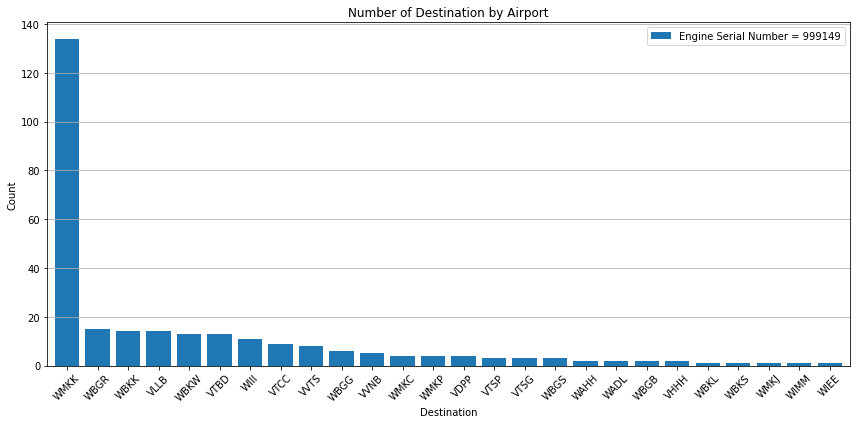

In [30]:
destination_counts = df_aircraft_engine01["destination_icao"].value_counts()
destination_counts.plot(kind="bar", width=0.8)
plt.grid(True, axis="y")
plt.xticks(rotation=45)
plt.title("Number of Destination by Airport")
plt.xlabel("Destination")
plt.ylabel("Count")
plt.legend(['Engine Serial Number = 999149'])
plt.tight_layout()
plt.show()

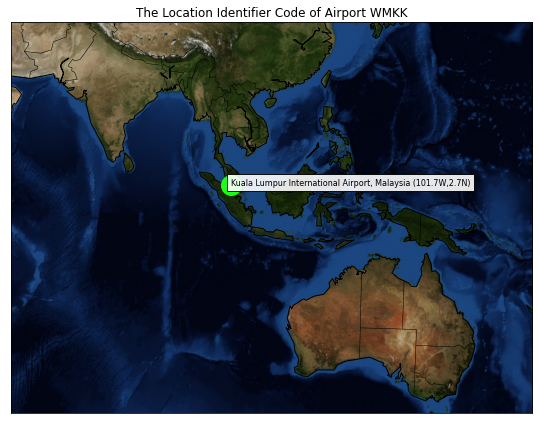

In [31]:
m = Basemap(width=12000000,height=9000000,projection='lcc',resolution='c',lat_0=-4,lon_0=110)
m.bluemarble(scale=0.5)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
longitude1,latitude1 = m(101.698, 2.743)
lonpt, latpt = m(longitude1,latitude1,inverse=True)
m.plot(longitude1,latitude1,'o', color='#1aff1a', markersize=20)
plt.title("The Location Identifier Code of Airport WMKK")
plt.text(longitude1,latitude1,'Kuala Lumpur International Airport, Malaysia (%5.1fW,%3.1fN)' % (lonpt,latpt),bbox=dict(facecolor='white', alpha=0.9), size=8)
plt.tight_layout()
plt.show()

In [32]:
results = df_aircraft_engine01.groupby(['destination_icao','flight_cycle','p30']).agg({"hpc_eff_mod":['min','max','mean']}).reset_index()
results.tail(20)

destination_icao flight_cycle    p30 hpc_eff_mod                
                                                 min     max    mean
256             WMKK          268 553.58       0.001   0.001   0.001
257             WMKK          270 552.97      0.0022  0.0022  0.0022
258             WMKK          272 552.14      0.0033  0.0033  0.0033
259             WMKK          277 552.61       0.003   0.003   0.003
260             WMKK          279 552.69     -0.0019 -0.0019 -0.0019
261             WMKK          282 552.27      0.0027  0.0027  0.0027
262             WMKK          284 553.08       0.001   0.001   0.001
263             WMKK          287 553.14      -0.001  -0.001  -0.001
264             WMKK          288    552      0.0008  0.0008  0.0008
265             WMKK          290 552.55     -0.0022 -0.0022 -0.0022
266             WMKK          292 551.58      0.0025  0.0025  0.0025
267             WMKK          293 552.52      0.0037  0.0037  0.0037
268             WMKK          295  551.6      0.0016  0.0016  0.0016
269             WMKK          298 552.23     -0.0018 -0.0018 -0.0018
270             WMKK          301 552.14           0       0       0
271             WMKK          303    552     -0.0055 -0.0055 -0.0055
272             WMKP           14 554.58     -0.0001 -0.0001 -0.0001
273             WMKP           15 554.76     -0.0039 -0.0039 -0.0039
274             WMKP           35 554.37      0.0015  0.0015  0.0015
275             WMKP          283 552.37      0.0003  0.0003  0.0003

In [33]:
hpc_outlet_aircraft_engine01 = df_aircraft_engine01.loc[(df_aircraft_engine01["depart_icao"] =='WMKK') | (df_aircraft_engine01["depart_icao"] =='WIII') | (df_aircraft_engine01["depart_icao"] =='VTBD') ]
hpc_outlet_aircraft_engine01.head()

,dataset,esn,unit,flight_cycle,...,nf_dmd,pcnfr_dmd,w31,w32
54,test_FD001,999149,49,1,...,2388,100,38.95,23.361
56,test_FD001,999149,49,3,...,2388,100,39.1,23.4173
57,test_FD001,999149,49,4,...,2388,100,38.89,23.3802
58,test_FD001,999149,49,5,...,2388,100,39.04,23.3513
59,test_FD001,999149,49,6,...,2388,100,38.97,23.4372


In [34]:
figure01 = px.box(hpc_outlet_aircraft_engine01, x="depart_icao", y="t30", 
                  title="Total Temperature at High Pressure Compressor Outlet by Departure Airport")
figure01.show()

In [35]:
 #comass, span, halflife, and alpha are mutually exclusive
figure02 = px.scatter(hpc_outlet_aircraft_engine01, x="phi", y="w31",
                      hover_name ="depart_icao",
                      trendline="lowess",
                      trendline_scope = "overall",
                      trendline_options=dict(frac=1),
                      trendline_color_override="#00b33c",
                      title="High Pressure Turbine Coolant Bleed as a Function of Ratio Fuel Flow for the ps30")
figure02.show()

In [36]:
figure03 = px.scatter(hpc_outlet_aircraft_engine01, x="t30", y="p30",
                       hover_name ="depart_icao",
                       trendline="lowess",
                       trendline_scope = "overall",
                       trendline_options=dict(frac=1),
                       trendline_color_override="#ff3333",
                       title="Total Pressure HPC Outlet and Total Temperature HPC Outlet")
figure03.show()

In [37]:
df02_flight_data = pd.read_excel("../data/GE_Dataset_ Task1.xlsx",sheet_name="av_engine_data_fron_psql", engine="openpyxl",parse_dates=True)
df02_flight_data.head()

,dataset,esn,unit,flight_cycle,...,nf_dmd,pcnfr_dmd,w31,w32
0,train_FD001,999050,50,1,...,2388,100,38.8,23.3016
1,train_FD001,999050,50,2,...,2388,100,38.99,23.344
2,train_FD001,999050,50,3,...,2388,100,38.91,23.319
3,train_FD001,999050,50,4,...,2388,100,38.95,23.3161
4,train_FD001,999050,50,5,...,2388,100,38.83,23.3256


In [38]:
df02_flight_data["dataset"].unique()

array(['train_FD001', 'test_FD001'], dtype=object)

In [39]:
df02_flight_data["esn"].unique()

array([999050, 999021, 999015, 999129, 999105, 999046, 999119, 999025,
       999113, 999053, 999124, 999047, 999141, 999003, 999158, 999061,
       999142, 999052, 999156, 999023, 999014, 999159, 999017, 999121,
       999115, 999028, 999109, 999036, 999135, 999007, 999184, 999171,
       999195, 999192, 999167, 999087, 999078, 999089, 999068, 999067,
       999189, 999086, 999073, 999075, 999081, 999066])

In [40]:
df02_flight_data.isna().sum()

dataset              0
esn                  0
unit                 0
flight_cycle         0
datetime             0
operator             0
depart_icao         30
destination_icao    63
hpc_eff_mod          0
hpc_flow_mod         0
tra                  0
t2                   0
t24                  0
t30                  0
t50                  0
p2                   0
p15                  0
p30                  0
nf                   0
nc                   0
epr                  0
ps30                 0
phi                  0
nrf                  0
nrc                  0
bpr                  0
farb                 0
htbleed              0
nf_dmd               0
pcnfr_dmd            0
w31                  0
w32                  0
dtype: int64

In [41]:
df02_flight_data.duplicated().any()

False

In [42]:
df02_flight_data.shape

(7290, 32)

In [43]:
df02_flight_data_clean = df02_flight_data.dropna(how='any')

In [44]:
df02_flight_data_clean.loc[:,['hpc_eff_mod','hpc_flow_mod','t24','t30','p2','p15','p30','t50','w31']].describe()

,hpc_eff_mod,hpc_flow_mod,t24,t30,p2,p15,p30,t50,w31
count,7224,7224,7224,7224,7224,7224,7224,7224,7224
mean,2.61628e-05,-3.87597e-06,642.653,1590.13,14.62,21.6098,553.417,1406.93,38.8284
std,0.00222137,0.000295373,0.485856,5.9181,5.32944e-15,0.00146274,0.856019,6.65027,0.175418
min,-0.0084,-0.0006,641.39,1573.06,14.62,21.6,550.48,1384.39,38.19
25%,-0.0014,-0.0003,642.31,1586.04,14.62,21.61,552.88,1401.8,38.72
50%,0,0,642.61,1589.66,14.62,21.61,553.5,1407.39,38.845
75%,0.0015,0.0002,642.95,1593.96,14.62,21.61,554.04,1411.87,38.95
max,0.0083,0.0006,644.44,1614.72,14.62,21.61,555.54,1424.26,39.41


In [45]:
df02_flight_data_clean['datetime'].min()

Timestamp('2017-12-31 18:22:57')

In [46]:
df02_flight_data_clean['datetime'].max()

Timestamp('2018-07-16 01:52:04')

In [47]:
df02_flight_data_clean.groupby(['dataset','esn']).agg({"flight_cycle":['sum','max']}).reset_index()

dataset     esn flight_cycle     
                                 sum  max
0    test_FD001  999105         4812   98
1    test_FD001  999109         1524   55
2    test_FD001  999113        19033  195
3    test_FD001  999115         2926   76
4    test_FD001  999119         9027  135
5    test_FD001  999121        10826  148
6    test_FD001  999124        16380  186
7    test_FD001  999129        14433  171
8    test_FD001  999135        19701  198
9    test_FD001  999141         7563  123
10   test_FD001  999142        12246  156
11   test_FD001  999156         9316  136
12   test_FD001  999158        15576  176
13   test_FD001  999159         4465   94
14   test_FD001  999167         2556   71
15   test_FD001  999171         2346   68
16   test_FD001  999184        14763  172
17   test_FD001  999189        14790  176
18   test_FD001  999192        10993  150
19   test_FD001  999195         4005   89
20  train_FD001  999003        10360  144
21  train_FD001  999007        25878  227
22  train_FD001  999014         8128  127
23  train_FD001  999015        14535  170
24  train_FD001  999017        25122  226
25  train_FD001  999021        13861  166
26  train_FD001  999023         8646  131
27  train_FD001  999025        11128  150
28  train_FD001  999028         8999  134
29  train_FD001  999036         5676  107
30  train_FD001  999046        22756  215
31  train_FD001  999047        17020  184
32  train_FD001  999050        13203  162
33  train_FD001  999052        15400  175
34  train_FD001  999053        14947  174
35  train_FD001  999061        10153  142
36  train_FD001  999066        11628  152
37  train_FD001  999067        40755  286
38  train_FD001  999068        16836  183
39  train_FD001  999073        16058  179
40  train_FD001  999075        22698  213
41  train_FD001  999078        15382  175
42  train_FD001  999081        14800  173
43  train_FD001  999086        37791  275
44  train_FD001  999087        13573  165
45  train_FD001  999089        16405  181

In [48]:
df_aircraft_engine02 = df02_flight_data_clean[df02_flight_data_clean.esn==999067]

In [49]:
hpc_outlet_aircraft_engine02 = df_aircraft_engine02.loc[(df_aircraft_engine02["depart_icao"] =='KLAS') | (df_aircraft_engine02["depart_icao"] =='KDEN') | (df_aircraft_engine02["depart_icao"]=='KMCO')]
hpc_outlet_aircraft_engine02.head()

,dataset,esn,unit,flight_cycle,...,nf_dmd,pcnfr_dmd,w31,w32
4660,train_FD001,999067,67,7,...,2388,100,39,23.3112
4663,train_FD001,999067,67,10,...,2388,100,38.81,23.2336
4665,train_FD001,999067,67,12,...,2388,100,38.98,23.3586
4667,train_FD001,999067,67,14,...,2388,100,38.89,23.3984
4669,train_FD001,999067,67,16,...,2388,100,39.08,23.3985


In [50]:
figure05 = px.box(hpc_outlet_aircraft_engine02, x="depart_icao", y="t30", 
                  title="Total Temperature at High Pressure Compressor Outlet by Departure Airport")
figure05.show()

In [51]:
df_aircraft_engine02_sort = df_aircraft_engine02.sort_values(by="flight_cycle")
figure06 = px.line(df_aircraft_engine02_sort, 
                    x="flight_cycle", 
                    y="nf",
                    hover_name='esn',
                    line_shape='spline',
                    markers=True,
                    color_discrete_sequence=["#538cc6"],
                    title="Line Graph of Physical Fan Speed per Flight Cycles ")
figure06.show()

In [52]:
figure07 = px.line(df_aircraft_engine02_sort, 
                   x="flight_cycle", 
                   y="nc",
                   hover_name='esn',
                   line_shape='spline',
                   markers=True,
                   title="Line Graph of Physical Core Speed per Flight Cycles")
figure07.show()

In [53]:
figure08 = px.line(df_aircraft_engine02_sort,
                    x="flight_cycle", 
                    y="nrf", 
                    hover_name='esn',
                    line_shape='spline',
                    markers=True,
                    color_discrete_sequence=["#4080bf"],
                    title="Line Graph of Corrected Fan Speed per Flight Cycles")
figure08.show()

In [54]:
figure09 = px.line(df_aircraft_engine02_sort, 
                   x="flight_cycle", 
                   y="nrc", 
                   hover_name='esn',
                   line_shape='spline',
                   markers=True,
                   color_discrete_sequence=["#6699cc"],
                   title="Line Graph of Corrected Core Speed per Flight Cycles")
figure09.show()

In [55]:
df_aircraft_engine03 = df02_flight_data_clean[df02_flight_data_clean.esn==999068]

In [56]:
df_aircraft_engine03['hpc_eff_mod'].max()

0.0051

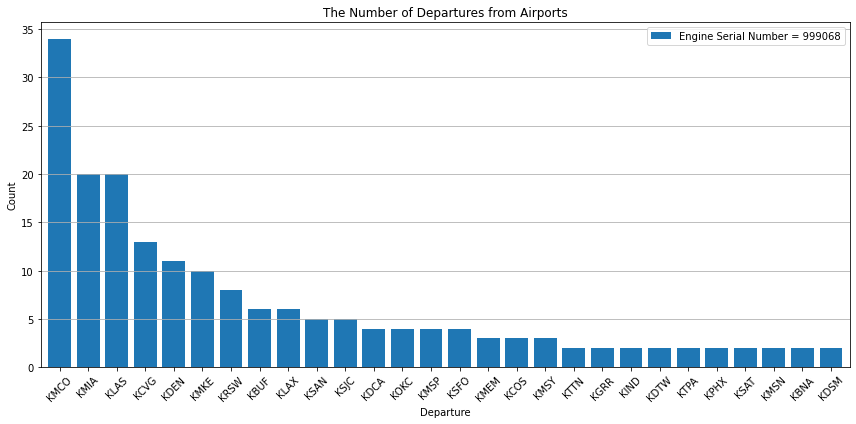

In [57]:
departure_airport_counts03 = df_aircraft_engine03["depart_icao"].value_counts()
departure_airport_counts03.plot(kind="bar", width=0.8)
plt.grid(True, axis="y")
plt.xticks(rotation=45)
plt.title("The Number of Departures from Airports")
plt.xlabel("Departure")
plt.ylabel("Count")
plt.legend(['Engine Serial Number = 999068'])
plt.tight_layout()
plt.show()

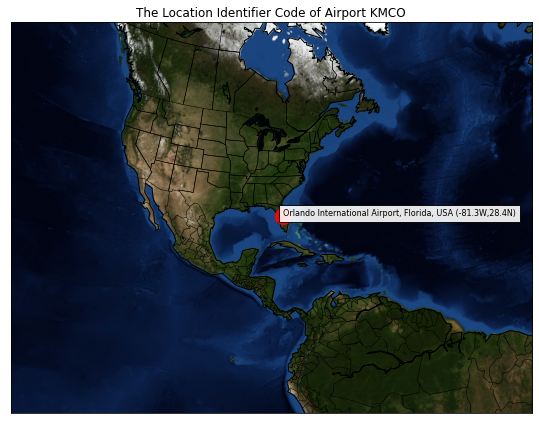

In [58]:
m = Basemap(width=12000000,height=9000000,projection='lcc',resolution='c', lat_0=28,lon_0=-84.)
m.bluemarble(scale=0.5)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
longitude2,latitude2 = m(-81.309, 28.429)
lonpt2, latpt2 = m(longitude2,latitude2,inverse=True)
m.plot(longitude2,latitude2,'o', color='#ff0000', markersize=16)
plt.title("The Location Identifier Code of Airport KMCO")
plt.text(longitude2,latitude2,'Orlando International Airport, Florida, USA (%5.1fW,%3.1fN)' % (lonpt2,latpt2),bbox=dict(facecolor='white', alpha=0.9), size=8)
plt.tight_layout()
plt.show()

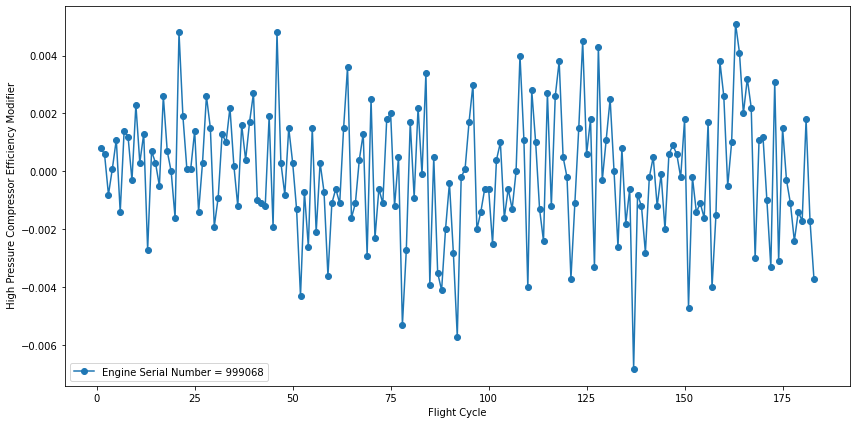

In [59]:
plt.rcParams["figure.figsize"]=(12,6)
plt.plot(df_aircraft_engine03.flight_cycle, df_aircraft_engine03.hpc_eff_mod, marker="o")
plt.xlabel("Flight Cycle")
plt.ylabel(" High Pressure Compressor Efficiency Modifier")
plt.legend(['Engine Serial Number = 999068'], loc='lower left')
plt.tight_layout()
plt.show()

In [60]:
figure10 = px.scatter(df_aircraft_engine03, x="flight_cycle", y="hpc_flow_mod",
                       hover_name ="depart_icao",
                       trendline="ewm",
                       trendline_scope = "overall",
                       trendline_options=dict(halflife=0.1),
                       color_discrete_sequence=["#6699cc"],
                       title="High Pressure Compressor Flow Modifier per Flight Cycle")
figure10.show()

In [61]:
df_flight_data_merge01 = pd.merge(left=df01_flight_data_clean, right=df02_flight_data_clean, how='right')

In [62]:
df_flight_data_merge01.head()

,dataset,esn,unit,flight_cycle,...,nf_dmd,pcnfr_dmd,w31,w32
0,train_FD001,999050,50,1,...,2388,100,38.8,23.3016
1,train_FD001,999050,50,2,...,2388,100,38.99,23.344
2,train_FD001,999050,50,3,...,2388,100,38.91,23.319
3,train_FD001,999050,50,4,...,2388,100,38.95,23.3161
4,train_FD001,999050,50,5,...,2388,100,38.83,23.3256


In [63]:
df_flight_data_merge01['esn'].unique()

array([999050, 999021, 999015, 999129, 999105, 999046, 999119, 999025,
       999113, 999053, 999124, 999047, 999141, 999003, 999158, 999061,
       999142, 999052, 999156, 999023, 999014, 999159, 999017, 999121,
       999115, 999028, 999109, 999036, 999135, 999007, 999184, 999171,
       999195, 999192, 999167, 999087, 999078, 999089, 999068, 999067,
       999189, 999086, 999073, 999075, 999081, 999066])

In [64]:
df03_flight_data = pd.read_excel("../data/GE_Dataset_ Task1.xlsx",sheet_name="av_engine_data_aic_psql", engine="openpyxl",parse_dates=True)
df03_flight_data.tail()

,dataset,esn,unit,flight_cycle,...,nf_dmd,pcnfr_dmd,w31,w32
5815,train_FD001,999069,69,330,...,2388,100,38.53,23.0549
5816,train_FD001,999069,69,331,...,2388,100,38.28,23.061
5817,train_FD001,999069,69,332,...,2388,100,38.47,23.0422
5818,train_FD001,999069,69,333,...,2388,100,38.52,23.1208
5819,train_FD001,999069,69,334,...,2388,100,38.42,22.9782


In [65]:
df03_flight_data["esn"].unique()

array([999001, 999012, 999120, 999134, 999006, 999154, 999035, 999157,
       999063, 999148, 999004, 999104, 999039, 999139, 999059, 999138,
       999018, 999161, 999038, 999117, 999043, 999031, 999102, 999137,
       999016, 999116, 999042, 999130, 999144, 999128, 999166, 999175,
       999177, 999088, 999092, 999070, 999077, 999082, 999198, 999069])

In [66]:
df03_flight_data_clean = df03_flight_data.dropna(how='any')

In [67]:
df03_flight_data_clean.loc[:,['hpc_eff_mod','hpc_flow_mod','t24','t30','p2','p15','p30','t50','w31']].describe()

,hpc_eff_mod,hpc_flow_mod,t24,t30,p2,p15,p30,t50,w31
count,5761,5761,5761,5761,5761,5761,5761,5761,5761
mean,2.97865e-05,1.68721e-05,182.967,1589.94,14.62,21.6098,553.458,1406.72,38.8337
std,0.00219799,0.000294127,0.472635,5.87685,1.77651e-15,0.00126701,0.841241,6.44487,0.171268
min,-0.0086,-0.0006,181.48,1569.04,14.62,21.6,549.85,1387.15,38.22
25%,-0.0014,-0.0002,182.64,1585.84,14.62,21.61,552.96,1402.14,38.73
50%,0,0,182.93,1589.47,14.62,21.61,553.56,1406.91,38.85
75%,0.0015,0.0003,183.26,1593.52,14.62,21.61,554.03,1411.41,38.96
max,0.0076,0.0006,184.86,1612.11,14.62,21.61,555.84,1423.76,39.41


In [68]:
df_flight_data_merge02 = pd.merge(left=df_flight_data_merge01,right=df03_flight_data_clean,how='right')

In [69]:
df_flight_data_merge02.tail()

,dataset,esn,unit,flight_cycle,...,nf_dmd,pcnfr_dmd,w31,w32
5756,train_FD001,999069,69,330,...,2388,100,38.53,23.0549
5757,train_FD001,999069,69,331,...,2388,100,38.28,23.061
5758,train_FD001,999069,69,332,...,2388,100,38.47,23.0422
5759,train_FD001,999069,69,333,...,2388,100,38.52,23.1208
5760,train_FD001,999069,69,334,...,2388,100,38.42,22.9782


In [70]:
df04_flight_data = pd.read_excel("../data/GE_Dataset_ Task1.xlsx",sheet_name="av_engine_data_pgt_psql", engine="openpyxl",parse_dates=True)
df04_flight_data.sample(n=5)

,dataset,esn,unit,flight_cycle,...,nf_dmd,pcnfr_dmd,w31,w32
5333,test_FD001,999186,86,43,...,2388,100,38.89,23.3442
947,test_FD001,999133,33,36,...,2388,100,38.92,23.2829
2563,test_FD001,999103,3,121,...,2388,100,38.79,23.1749
2959,train_FD001,999041,41,121,...,2388,100,38.99,23.2998
5957,train_FD001,999095,95,133,...,2388,100,39.13,23.4728


In [71]:
df04_flight_data_clean = df04_flight_data.dropna(how='any')

In [72]:
df_flight_data_merge03 = pd.merge(left=df_flight_data_merge02,right=df04_flight_data_clean,how='right')

In [73]:
df_flight_data_merge03['dataset'].value_counts()

train_FD001    3338
test_FD001     2601
Name: dataset, dtype: int64

Location Data 

Columns

airport_icao: Unique 4-letter identifier for a given airporticao(International Civil Aviation Organization)

latitude: The angular distance of a place north or south of the earth's equator, expressed in signed degrees format that are positive values are north of the equator)

longitude: The angular distance of a place east or west of the meridian at Greenwich, England that area positive values are east of the Prime Meridian

In [74]:
df05_location_data = pd.read_excel("../data/GE_Dataset_ Task1.xlsx",sheet_name="av_lkp_airport_codes_t_psql", engine="openpyxl",parse_dates=True)
df05_location_data.sample(5)

,airport_icao,destination_latitude,destination_longitude
259,VILK,26.762,80.883
18,WIEE,-0.786,100.28
148,VTCT,19.952,99.883
106,KPVD,41.724,-71.428
306,MDPC,18.571,-68.366


In [75]:
df05_location_data.shape

(319, 3)

In [76]:
df05_location_data[df05_location_data.airport_icao=='WMKK']

,airport_icao,destination_latitude,destination_longitude
85,WMKK,2.743,101.698


In [77]:
df05_location_data['destination_latitude'].min()

-8.758

In [78]:
df05_location_data['destination_latitude'].max()

60.203

In [79]:
df05_location_data['destination_longitude'].min()

-122.597

In [80]:
df05_location_data['destination_longitude'].max()

125.646

In [81]:
df05_location_data.dtypes

airport_icao              object
destination_latitude     float64
destination_longitude    float64
dtype: object

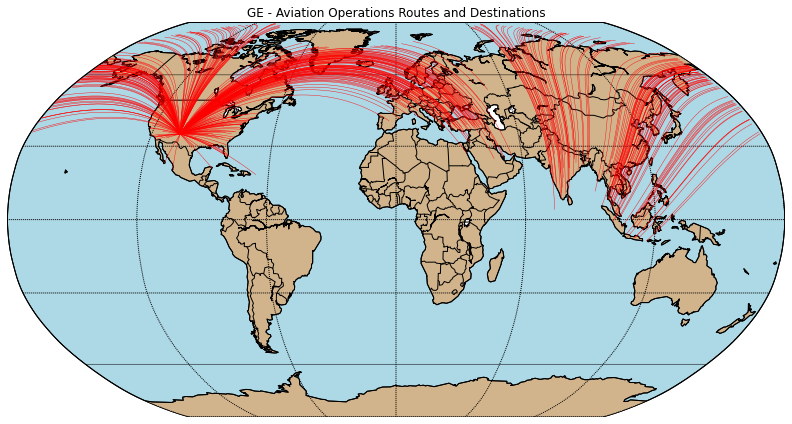

In [82]:
routes = []
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,360.,60.))
m.drawcoastlines()
m.fillcontinents(color='tan')
m.drawcountries(linewidth=1) 
m.drawmapboundary(fill_color='#add8e6')

for name, row in df05_location_data.iloc[:300,[1,2]].iterrows():
    m.drawgreatcircle(
            row["destination_longitude"],
            row["destination_latitude"],
            lon2=-106,
            lat2=35,
            linewidth=0.4,
            color='#ff0000'
        )
plt.title("GE - Aviation Operations Routes and Destinations")
plt.tight_layout()
plt.show();

In [83]:
mapbox_access_token = "pk.eyJ1IjoiZGV2ZWxvcGVyLWpvc2UiLCJhIjoiY2t6MWRtdm5mMDM4NzJvcnd3ZjNnOGxweSJ9.SHdMi0UbdtEIPcE-V66p7g"
site_lat = df05_location_data.destination_latitude
site_lon = df05_location_data.destination_longitude 
locations_name = df05_location_data.airport_icao

data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=8,
            symbol = "airport",
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=8,
            symbol = "airport",
            color='rgb(242, 177, 172)',
            opacity=0.7
        ),
        hoverinfo='text'
    )]


layout = go.Layout(
    title='The Airport Locations',
    autosize=True,
    hovermode='closest',
    showlegend=True,
    mapbox=dict(
        accesstoken=mapbox_access_token,
         bearing=0,
        center=dict(
            lat=37.363,
            lon=-121.929
        ),
        pitch=0,
        zoom=13.2,
        style='satellite-streets'
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='jupyter-Location Data')

Manufacturing Data

Columns

esn: Engine Serial Number

pn: 3 parts represented in this dataset

sn: Unique serial number for a given part 

vsstream: Supply chain value stream for part, 3 represented in this dataset

In [84]:
df06_manufacturing_data = pd.read_excel("../data/GE_Dataset_ Task1.xlsx",sheet_name="av_bom_manufacturing_psql", engine="openpyxl",parse_dates=True)
df06_manufacturing_data.sample(n=5)

,esn,pn,sn,desc,vstream
10256,999159,54321P01,9607979625,shroud,cmc
8078,999041,54321P01,7767651314,shroud,cmc
7278,999058,54321P01,8282349861,shroud,cmc
2225,999006,44321P02,4134783481,blade,machined_airfoils
5708,999052,44321P02,246133770,blade,machined_airfoils


In [85]:
df06_manufacturing_data.isna().sum()

esn        0
pn         0
sn         0
desc       0
vstream    0
dtype: int64

Remaining useful life

esn: Engine Serial Number 

rul: Remaining Useful Life

### What is remaining useful life?

Remaining useful life (RUL) is the length of time a machine is likely to operate before it requires repair or replacement.
By taking RUL into account, engineers can schedule maintenance, optimize operating efficiency, and avoid unplanned downtime.

For this reason, estimating RUL is a top priority in predictive maintenance programs.
The RUL assigned to the ESN is the number of operational cycles after the last cycle that engine will continue 
to operate.Remaining Useful Life is depicted as the number of cycles remaining until the engine needs to overhauled.

Engine Flight Cycle - A complete flight cycle includes the following events: engine start; a take-off and landing; and engine shutdown.

In [86]:
df07_av_esn_rul_data = pd.read_excel("../data/GE_Dataset_ Task1.xlsx",sheet_name="av_esn_rul_psql", engine="openpyxl",parse_dates=True)
df07_av_esn_rul_data.sample(n=5)

,esn,rul
38,999154,124
63,999116,106
93,999156,15
59,999171,130
0,999175,123


In [87]:
df07_av_esn_rul_data.shape

(100, 2)

In [88]:
df_flight_data_merge03.sample(5)

,dataset,esn,unit,flight_cycle,...,nf_dmd,pcnfr_dmd,w31,w32
5248,train_FD001,999095,95,55,...,2388,100,39.12,23.3942
4793,train_FD001,999084,84,6,...,2388,100,38.89,23.2502
3717,train_FD001,999051,51,150,...,2388,100,39,23.3297
4214,train_FD001,999051,51,180,...,2388,100,38.67,23.1033
3217,train_FD001,999051,51,118,...,2388,100,38.81,23.2894


In [89]:
max_flight_cycle = df_flight_data_merge03.groupby('esn', as_index=False)[['flight_cycle']].max()
max_flight_cycle.head()



,esn,flight_cycle
0,999005,251
1,999013,135
2,999020,214
3,999022,188
4,999024,82


In [90]:
df08_rul_data = pd.merge(max_flight_cycle,df07_av_esn_rul_data,on='esn')

In [91]:
df08_rul_data.head()

,esn,flight_cycle,rul
0,999101,31,149
1,999103,126,66
2,999112,217,141
3,999122,39,122
4,999125,48,171


In [92]:
df08_rul_data.shape

(24, 3)

In [93]:
df08_rul_data.rename(columns={"flight_cycle":"max_flight_cycle"}, inplace=True)

In [94]:
df08_rul_data.head()

,esn,max_flight_cycle,rul
0,999101,31,149
1,999103,126,66
2,999112,217,141
3,999122,39,122
4,999125,48,171


References

https://www.diva-portal.org/smash/get/diva2:945577/FULLTEXT01.pdf

https://www.theforage.com/modules/ThbphD5N5WRsd9Mxo/PDif4RapHRZLHb4gT?ref=WLAKhbpE2WPtZmHpo